Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from PIL import Image
import pytesseract
import requests
from io import BytesIO
import re
import difflib
import cv2
import easyocr

EasyOCR 

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


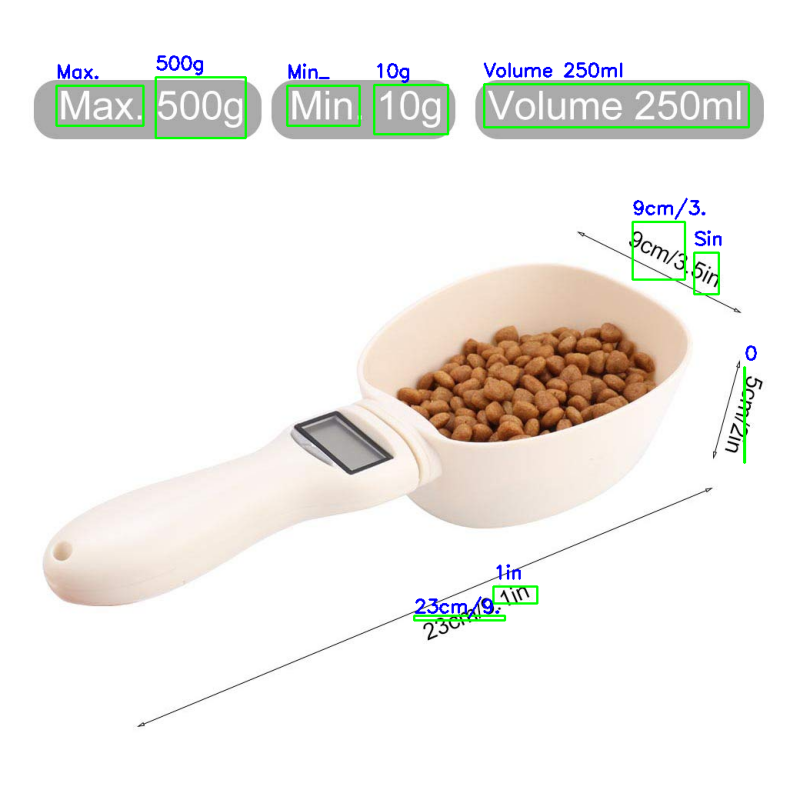

['Max.', 'Min_', '10g', 'Volume 250ml', '500g', '9cm/3.', 'Sin', '0', '1in', '23cm/9.']


In [13]:
# Function to display image with detected text
def display_image_with_text(img, results):
    # Convert image to OpenCV format if needed
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    
    # Loop through detected text results and draw bounding boxes
    for (bbox, text, prob) in results:
        # Extract the bounding box coordinates
        top_left = (int(bbox[0][0]), int(bbox[0][1]))
        bottom_right = (int(bbox[2][0]), int(bbox[2][1]))
        
        # Draw a rectangle around the detected text
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        
        # Put the detected text near the bounding box
        cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Function to get image data and process text using EasyOCR
def get_image_data(image_url):
    # Fetch the image from the URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))

    # Initialize the EasyOCR reader
    reader = easyocr.Reader(['en'], gpu = True)  # You can add other languages if needed
    
    # Perform text detection and recognition
    results = reader.readtext(np.array(img))
    
    # Display the image with bounding boxes around text
    display_image_with_text(img, results)
    
    # Extract and return the detected text
    extracted_text = [text for (_, text, _) in results]
    return extracted_text

# Test the function with the provided image URL
image_url = 'https://m.media-amazon.com/images/I/519c3S677DL.jpg'
extracted_text = get_image_data(image_url)
print(extracted_text)

Running through files only for 5 images EasyOCR


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
C:\Users\danis\AppData\Roaming\Python\Python312\site-packages\easyocr\detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on G

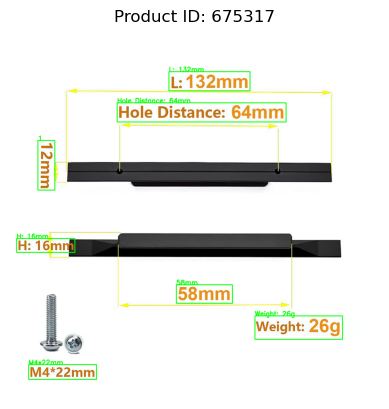

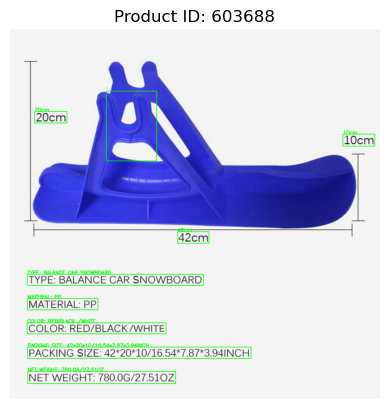

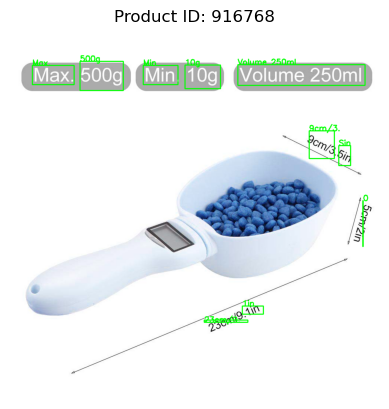

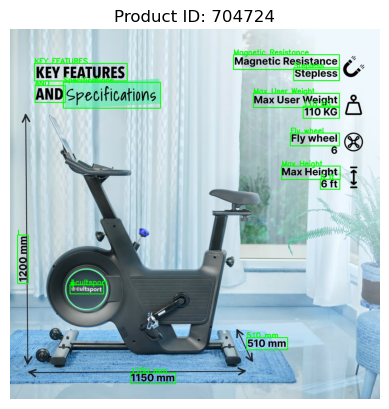

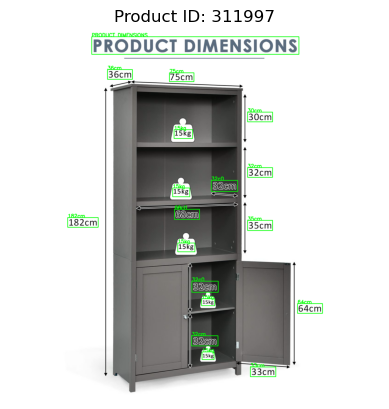

   Product ID  \
0      675317   
1      603688   
2      916768   
3      704724   
4      311997   

                                                                                                                                            Extracted Text  
0                                                                                          L: 132mm Hole Distance: 64mm 1 H: 16mm 58mm Weight: 26g M4*22mm  
1  2Ocm ' 1Ocm 42cm TYPE: BALANCE CAR SNOWBOARD MATERIAL: PP COLOR: REDIBLACK /WHITE PACKING SIZE: 42*20*10/16.54*7.87*3.94INCH NET WEIGHT: 780.06/27.510Z  
2                                                                                                 Max. Min_ 10g Volume 250ml 500g 9cm/3. Sin 0 1in 23cm/9.  
3                Magnetic Resistance KEY FEATURES Stepless AND Specifications Max User Weight 110 KG Fly wheel Max Height 6 ft L #cultsport 510 mm 1150 mm  
4                                                 PRODUCT DIMENSIONS 36cm 75cm 30cm 15kg 32cm 32c0 15kg 68c0 182

In [2]:


# Initialize EasyOCR reader
reader = easyocr.Reader(['en'], gpu=True)  # Use GPU if available and set to True

# Load the CSV file
file_path = 'Categories/width_category_products.csv'
df = pd.read_csv(file_path)

# Take the first 5 images
head_df = df.head(5)

# Function to download and process image
def process_image(url, product_id):
    # Download the image
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)))
    
    # Extract text using EasyOCR
    results = reader.readtext(img)
    
    # Draw bounding boxes on the image
    for (bbox, text, prob) in results:
        # Unpack the bounding box
        (top_left, top_right, bottom_right, bottom_left) = bbox
        top_left = tuple([int(val) for val in top_left])
        bottom_right = tuple([int(val) for val in bottom_right])
        
        # Draw the box on the image
        img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        img = cv2.putText(img, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    
    # Convert the image to RGB for displaying
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Show the image
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'Product ID: {product_id}')
    plt.show()
    
    # Return the extracted text
    return ' '.join([text for (_, text, _) in results])

# Create an empty list to store the results
output_list = []

# Loop through the first 5 images
for index, row in head_df.iterrows():
    product_id = row['group_id']  # Assuming product ID is stored in 'group_id'
    image_url = row['image_link']
    
    # Process each image
    extracted_text = process_image(image_url, product_id)
    
    # Append the results to the list
    output_list.append({'Product ID': product_id, 'Extracted Text': extracted_text})

# Set pandas to display full text in columns
pd.set_option('display.max_colwidth', None)  # None sets no limit on column width
pd.set_option('display.max_rows', None)      # Ensure all rows are shown if needed
pd.set_option('display.max_columns', 2)

# Convert the list to a DataFrame
output_df = pd.DataFrame(output_list)

# Display the extracted text table
print(output_df)


EasyOCR with Rotating Image

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


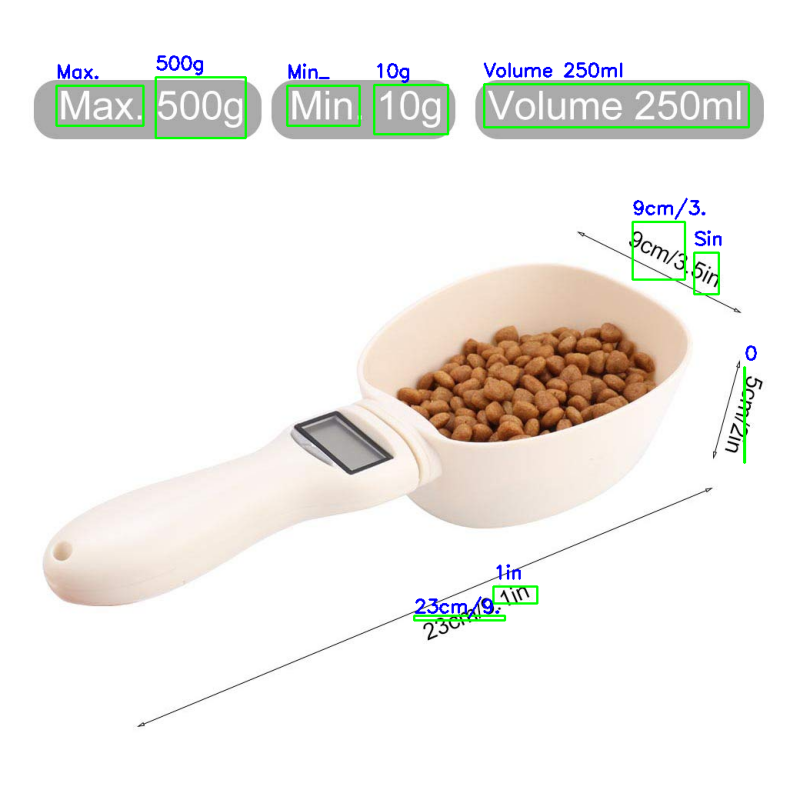

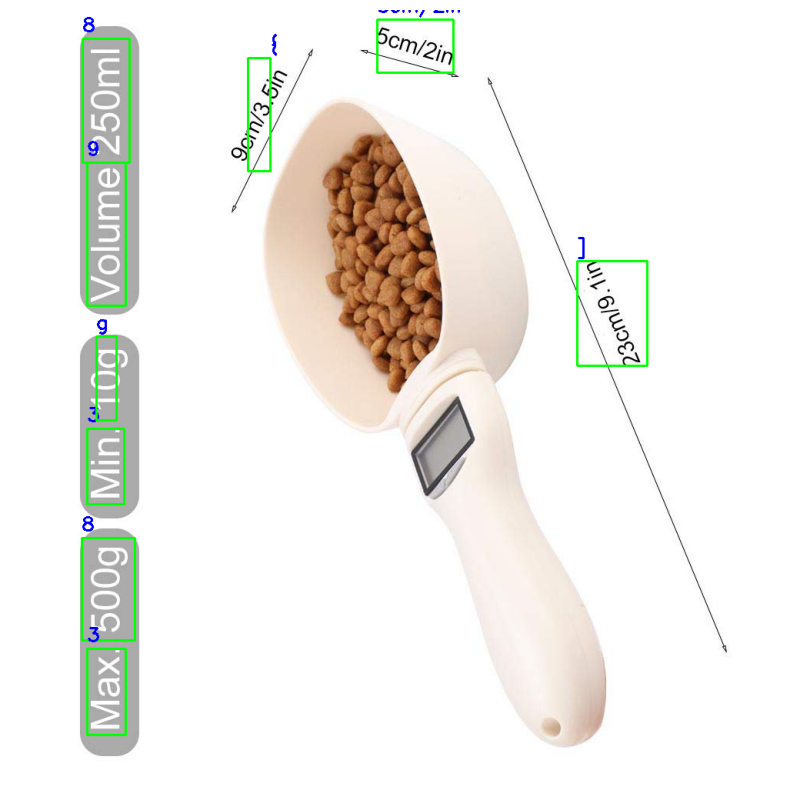

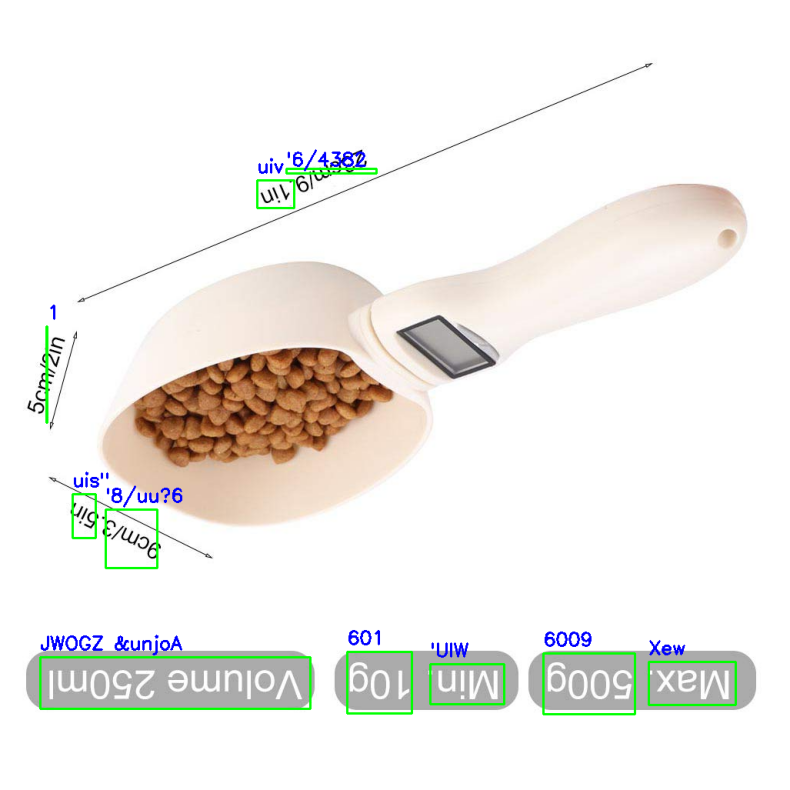

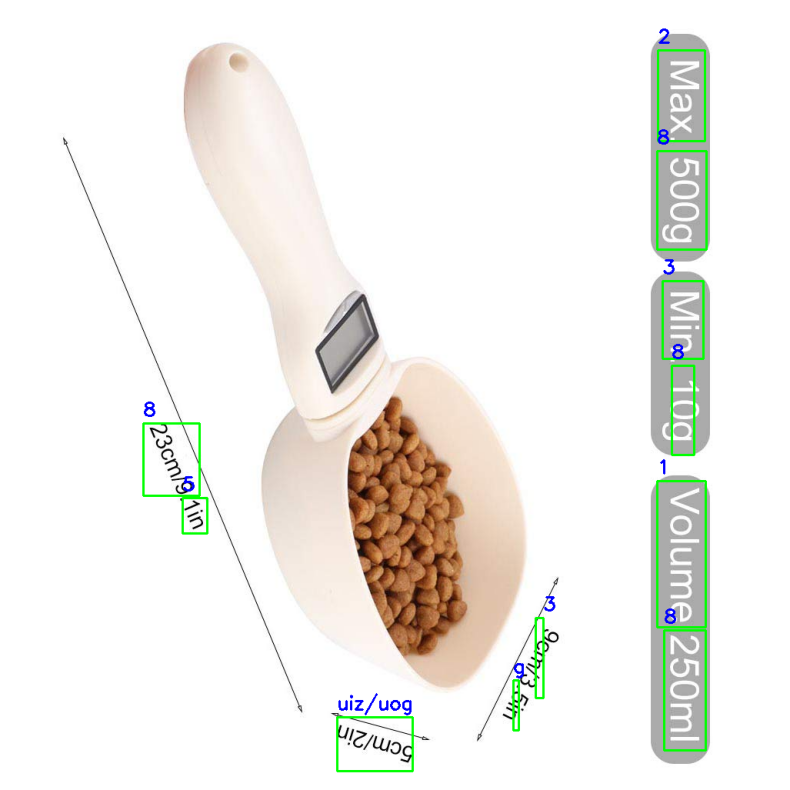

['Max.', 'Min_', '10g', 'Volume 250ml', '500g', '9cm/3.', 'Sin', '0', '1in', '23cm/9.', '8', '9', '3', '5cm/2in', '{', ']', 'g', 'uiv', 'JWOGZ &unjoA', "'UIW", 'Xew', "'6/4382", '1', 'uis"', "'8/uu?6", '601', '6009', '2', '5', 'uiz/uog']


In [15]:


# Function to clean the text
def clean_text(text):
    # Remove non-ASCII characters and keep only printable characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Remove excessive whitespace and unnecessary special characters
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Function to check if two strings are similar
def is_similar(text1, text2, threshold=0.8):
    # Calculate the similarity ratio between two texts
    return difflib.SequenceMatcher(None, text1, text2).ratio() > threshold

# Function to remove similar or duplicate texts
def remove_similar_texts(text_list):
    unique_texts = []
    for text in text_list:
        if not any(is_similar(text, unique_text) for unique_text in unique_texts):
            unique_texts.append(text)
    return unique_texts

# Function to display image with detected text
def display_image_with_text(img, results):
    # Convert image to OpenCV format if needed
    img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    
    # Loop through detected text results and draw bounding boxes
    for (bbox, text, prob) in results:
        # Extract the bounding box coordinates
        top_left = (int(bbox[0][0]), int(bbox[0][1]))
        bottom_right = (int(bbox[2][0]), int(bbox[2][1]))
        
        # Draw a rectangle around the detected text
        cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
        
        # Put the detected text near the bounding box
        cv2.putText(img, text, (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    
    # Display the image with bounding boxes
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Function to get image data and process text using EasyOCR
def get_image_data(image_url):
    # Fetch the image from the URL
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    
    # Initialize the EasyOCR reader
    reader = easyocr.Reader(['en'], gpu=True)
    
    # List to store extracted text from different rotations
    extracted_texts = []
    
    # Rotate the image in all four directions and extract text
    for angle in [0, 90, 180, 270]:
        # Rotate the image
        rotated_img = img.rotate(angle, expand=True)
        
        # Perform text detection and recognition
        results = reader.readtext(np.array(rotated_img))
        
        # Display the image with bounding boxes
        display_image_with_text(rotated_img, results)
        
        # Clean and store the detected text
        for _, text, _ in results:
            cleaned_text = clean_text(text)
            if cleaned_text:
                extracted_texts.append(cleaned_text)
    
    # Remove similar or duplicate texts
    unique_texts = remove_similar_texts(extracted_texts)
    
    return unique_texts

# Test the function with the provided image URL
image_url = 'https://m.media-amazon.com/images/I/519c3S677DL.jpg'
extracted_text = get_image_data(image_url)
print(extracted_text)
